In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import torch
from torch import nn, optim
from torch.nn import functional

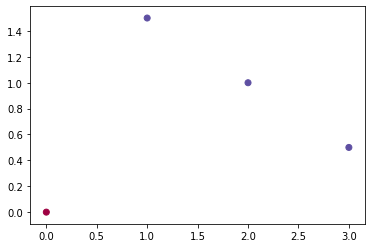

In [2]:
X = np.array([[0, 0], [1, 1.5], [2, 1], [3, 0.5]])
y = np.array([0, 1, 1, 1])

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

In [3]:
class MyNet(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(in_dim, in_dim)
        self.output = nn.Linear(in_dim, out_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.output(x)
        return x
    
    def predict(self, x):
        pred = functional.softmax(self.forward(x), dim = 0)
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [4]:
def MyPredict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

def plot_decision_result(pred_func, X):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max()+ .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max()+ .5
    h = 0.01
    xx, yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    y = pred_func(X)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

In [5]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

In [6]:
model = MyNet(2, 2)
learning_rate = 0.01

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
epochs = 10000
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    # print(y_pred)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i + 1) % (epochs / 10) == 0:
        print("epoch: {0} , loss: {1}".format(i + 1, loss.item()))

epoch: 1000 , loss: 0.0009900399018079042
epoch: 2000 , loss: 0.0002847078430932015
epoch: 3000 , loss: 0.0001245932944584638
epoch: 4000 , loss: 6.368489266606048e-05
epoch: 5000 , loss: 3.504672349663451e-05
epoch: 6000 , loss: 2.0086499716853723e-05
epoch: 7000 , loss: 1.1801626897067763e-05
epoch: 8000 , loss: 7.033315796434181e-06
epoch: 9000 , loss: 4.172313765593572e-06
epoch: 10000 , loss: 2.533193082854268e-06


In [8]:
print(accuracy_score(model.predict(X), y))

1.0


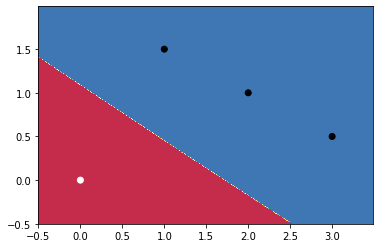

In [9]:
plot_decision_result(lambda x : MyPredict(x) , X.numpy())

In [10]:
TestX = np.array([[0.1, 0.3], [1, 2.5], [3, 0.1], [2, 2]])

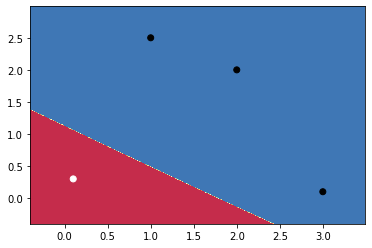

In [11]:
plot_decision_result(lambda x : MyPredict(x) , TestX)